# Модель с Mixup

Обучение:

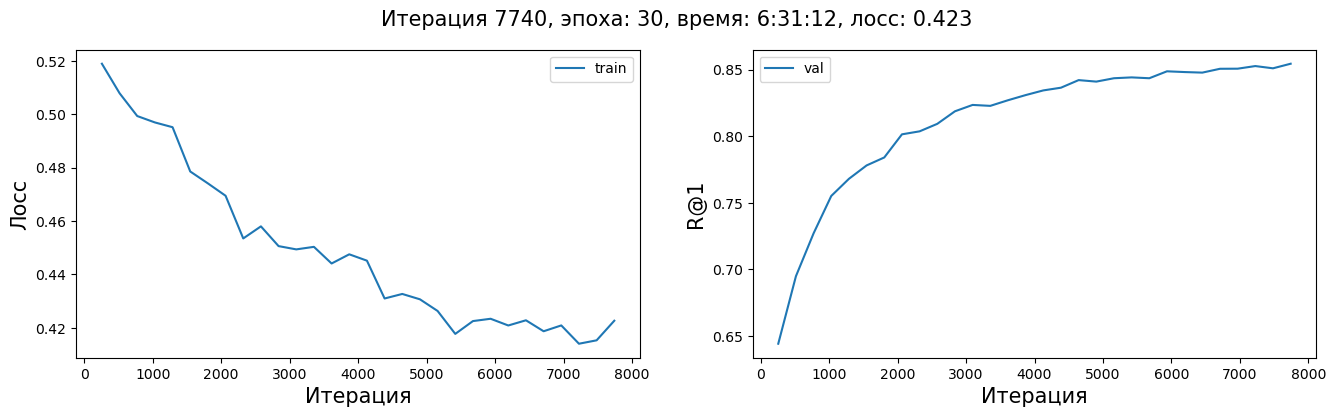

In [1]:
from train import train

model = train('data', 0.0001, 30, 'weights\\mixup', lr_decay_rate=0.9, mixup_mode=True)

Посмотрим на результаты:

Getting embeddings...


  0%|          | 0/127 [00:04<?, ?it/s]

  0%|          | 0/143 [00:04<?, ?it/s]

Computing distances...


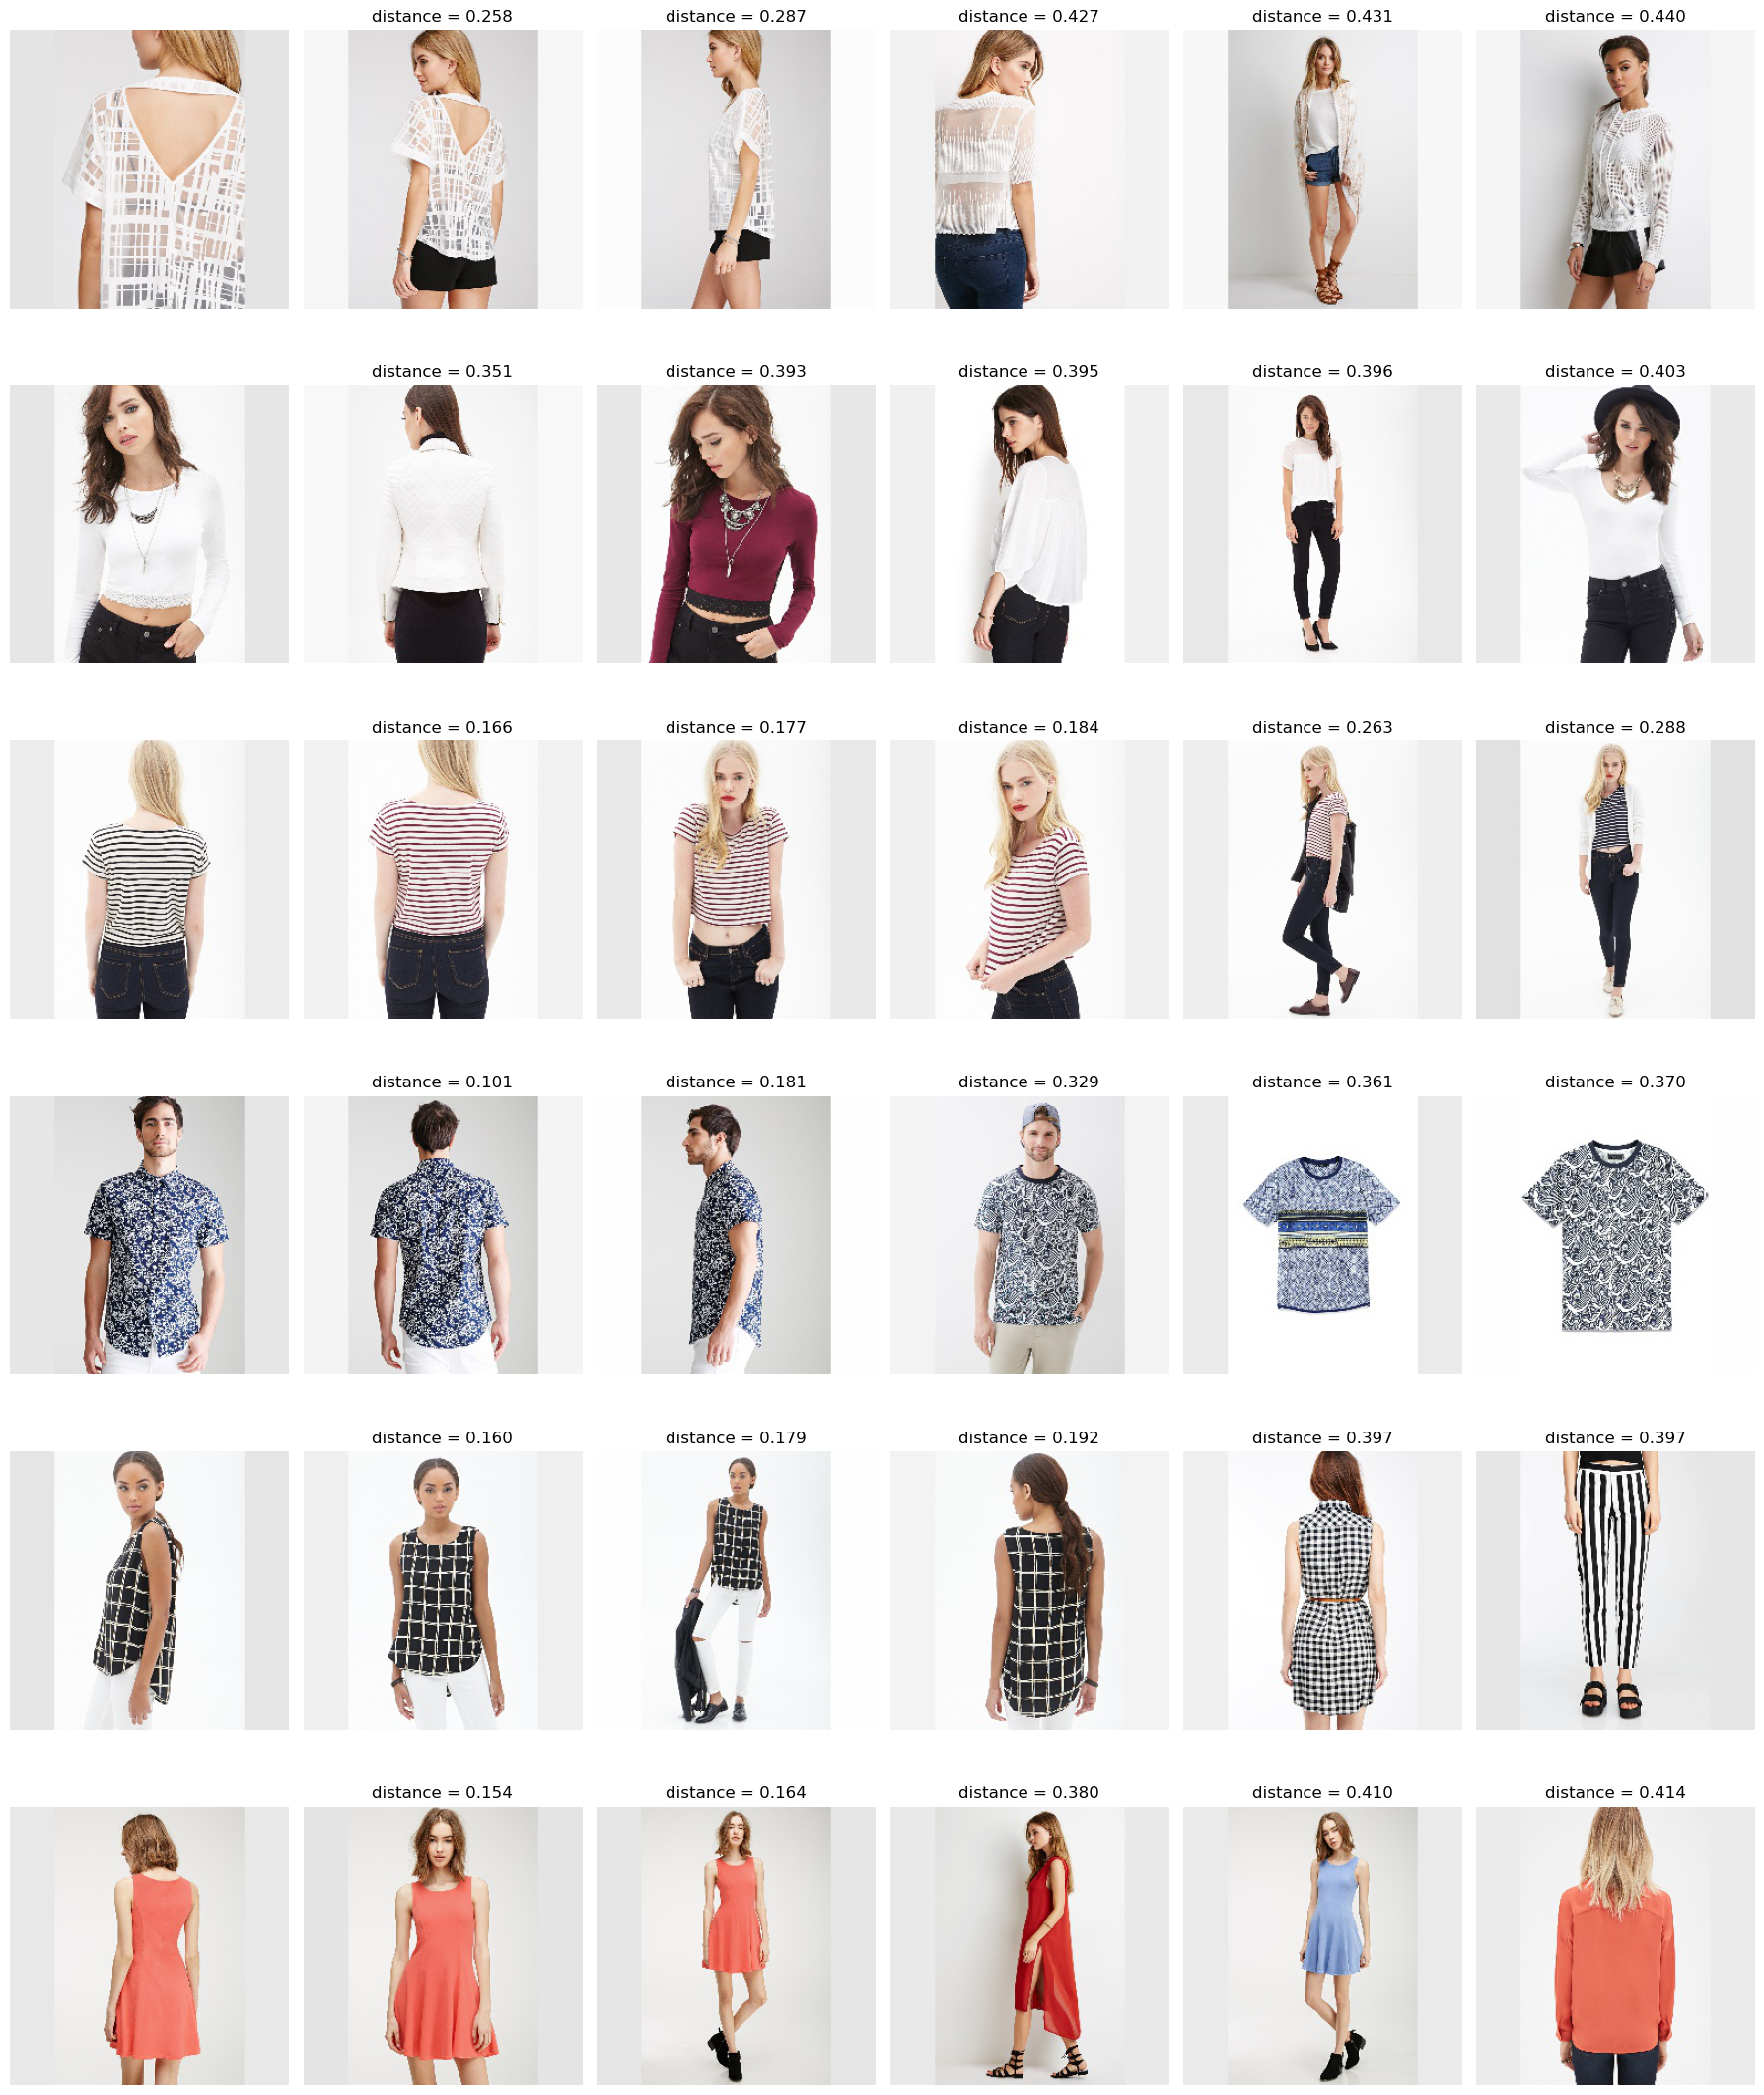

In [8]:
from inference import show_results

show_results(model, 'data')

Видим, что качество рекомендаций у модели получилось достаточно высоким.

Посмотрим на распределение тестовых примеров в двумерном пространстве (после сжатия через tSNE):

  0%|          | 0/127 [00:04<?, ?it/s]

C:\Users\Aleksei\anaconda3\envs\data_science_3.9\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Aleksei\anaconda3\envs\data_science_3.9\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


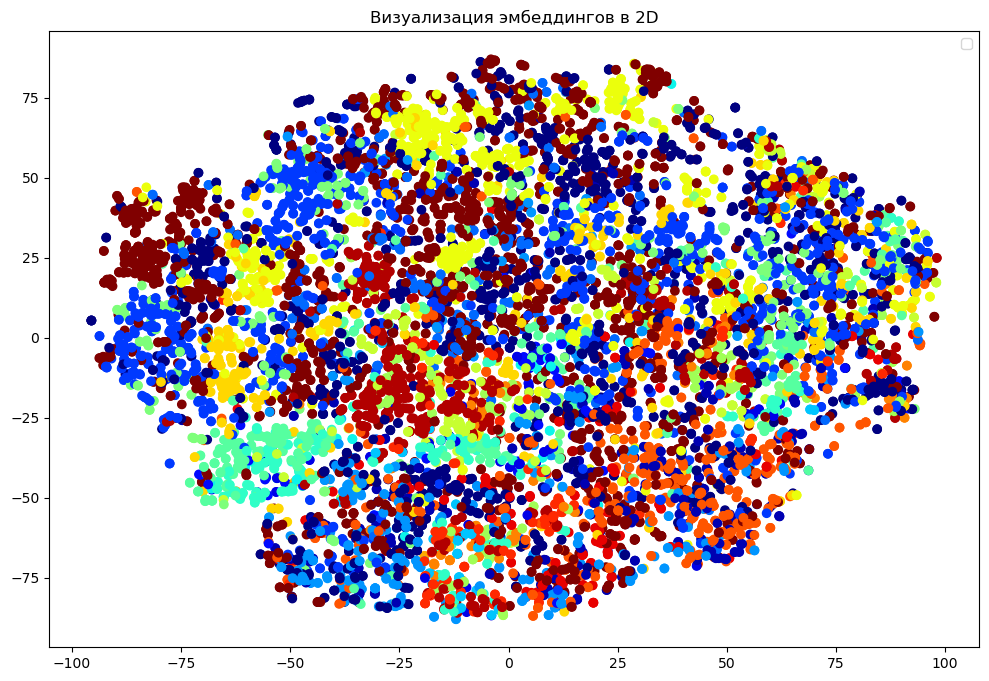

In [32]:
from inference import visualize_embeddings_2d

visualize_embeddings_2d(model, 'data')

Посчитаем метрики полученной модели:

In [2]:
from inference import compute_metrics

recall, article_metric = compute_metrics(model, 'data', k=[1, 3, 5, 10, 20])

Getting embeddings...


  0%|          | 0/127 [00:04<?, ?it/s]

  0%|          | 0/143 [00:04<?, ?it/s]

Computing distances...


C:\Users\Aleksei\course_cvdl\task_project\metrics.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  metrics_data['pred_rel_count'] = (pred_items == query_data['item_id'][:, None]).sum(axis=1)
C:\Users\Aleksei\course_cvdl\task_project\metrics.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  metrics_data['pred_rel_count'] = (pred_items == query_data['item_id'][:, None]).sum(axis=1)
C:\Users\Aleksei\course_cvdl\task_project\metrics.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  metrics_data['pred_rel_count'] = (pred_items == query_data['item_id'][:, None]).sum(axis=1)
C

Getting embeddings...


  0%|          | 0/127 [00:04<?, ?it/s]

  0%|          | 0/143 [00:05<?, ?it/s]

Computing distances...


C:\Users\Aleksei\course_cvdl\task_project\metrics.py:27: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  metrics_data['pred_rel_count'] = (pred_items == query_data['item_id'][:, None]).sum(axis=1)
C:\Users\Aleksei\course_cvdl\task_project\metrics.py:27: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  metrics_data['pred_rel_count'] = (pred_items == query_data['item_id'][:, None]).sum(axis=1)
C:\Users\Aleksei\course_cvdl\task_project\metrics.py:27: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  metrics_data['pred_rel_count'] = (pred_items == query_data['item_id'][:, None]).sum(axis=1)
C

In [3]:
for k, r in recall.items():
    print(f'R@{k} = {r:.3f}')
print()
for k, r in article_metric.items():
    print(f'Article R@{k} = {r:.3f}')

R@1 = 0.854
R@3 = 0.689
R@5 = 0.643
R@10 = 0.653
R@20 = 0.691

Article R@1 = 0.854
Article R@3 = 0.907
Article R@5 = 0.925
Article R@10 = 0.945
Article R@20 = 0.961
